In [1]:
import torch
from matplotlib import pyplot as plt
from matplotlib import animation

In [2]:
x = torch.autograd.Variable()
func = torch.nn.Softsign()

In [3]:
x.data = torch.linspace(-2,2, 100)

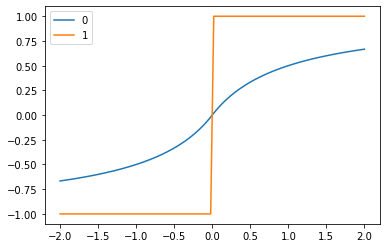

In [4]:
y = [
    lambda x: torch.nn.functional.softsign(x),
    lambda x: torch.sign(x),
    #lambda x: torch.exp(x) - torch.exp(-x),
    #lambda x: func(x),
    #lambda x: func(torch.exp(x) - torch.exp(-x)),
]

fig, ax = plt.subplots()
lines = [ax.plot(x, yy(x), label=str(i)) for i, yy in enumerate(y)]

#plt.ylim(-1,1)
plt.legend()
plt.show()

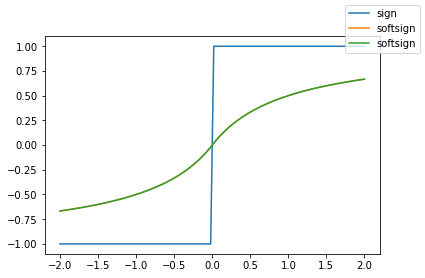

In [8]:
FRAMES = 100

softsign = lambda x: torch.nn.functional.softsign(x)
sign = lambda x: torch.sign(x)

ab = lambda x, alpha: (1-alpha) * softsign(x) + alpha * sign(x)

fig, ax = plt.subplots()
ax.plot(x, sign(x), label='sign')
ax.plot(x, softsign(x), label='softsign')

line, = ax.plot(x, sign(x), label='softsign')
fig.legend()

def animate(i):
    alpha = i / FRAMES
    line.set_data(x, ab(x, alpha))

ani = animation.FuncAnimation(fig, animate, frames=FRAMES)

from IPython.display import HTML
HTML(ani.to_jshtml())